## A NBA mudou, mas quanto? O objetivo dessa pesquisa é observar como o jogo mudou, aumentando o número de tentativas e acertos da linha de 3 pontos, comparando os melhores pontuadores da última temporada (2020-21) com os da melhor temporada de Michael Jordan (1990-91).

### O primeiro passo é fazer a raspagem dos dados, criando dataframes com os números de ambas temporadas

In [2]:
import pandas as pd

df_2021 = pd.read_csv('2021_NBA_per_game.csv')
df_2021.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,2,Jaylen Adams,PG,24.0,MIL,7.0,0.0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
3,3,Steven Adams,C,27.0,NOP,58.0,58.0,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
4,4,Bam Adebayo,C,23.0,MIA,64.0,64.0,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7


In [3]:
df_1991 = pd.read_csv('1991_NBA_per_game.csv')
df_1991.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,6.7,1.3,2.7,...,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1
2,2,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,22.5,6.2,15.1,...,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1
3,3,Mark Acres,C,28.0,ORL,68.0,0.0,19.3,1.6,3.1,...,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2
4,4,Michael Adams,PG,28.0,DEN,66.0,66.0,35.5,8.5,21.5,...,0.879,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5


### Agora, fazemos a limpeza dos nossos dataframes, excluíndo colunas que possuem apenas NaNs

In [4]:
cols = list(df_2021.columns.values)
print(cols)

df_2021 = df_2021[cols[1:30]].dropna(how='all')
df_2021

['Unnamed: 0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,12.1,2.0,3.7,0.544,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,Jaylen Adams,PG,24.0,MIL,7.0,0.0,2.6,0.1,1.1,0.125,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
3,Steven Adams,C,27.0,NOP,58.0,58.0,27.7,3.3,5.3,0.614,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
4,Bam Adebayo,C,23.0,MIA,64.0,64.0,33.5,7.1,12.5,0.570,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
5,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,25.9,5.4,11.4,0.473,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Delon Wright,PG,28.0,SAC,27.0,8.0,25.8,3.9,8.3,0.462,...,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
728,Thaddeus Young,PF,32.0,CHI,68.0,23.0,24.3,5.4,9.7,0.559,...,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
729,Trae Young,PG,22.0,ATL,63.0,63.0,33.7,7.7,17.7,0.438,...,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
730,Cody Zeller,C,28.0,CHO,48.0,21.0,20.9,3.8,6.8,0.559,...,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [5]:
cols = list(df_1991.columns.values)
df_1991 = df_1991[cols[1:30]].dropna(how='all')
df_1991

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,6.7,1.3,2.7,0.474,...,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1
2,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,22.5,6.2,15.1,0.413,...,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1
3,Mark Acres,C,28.0,ORL,68.0,0.0,19.3,1.6,3.1,0.509,...,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2
4,Michael Adams,PG,28.0,DEN,66.0,66.0,35.5,8.5,21.5,0.394,...,0.879,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5
5,Mark Aguirre,SF,31.0,DET,78.0,13.0,25.7,5.4,11.7,0.462,...,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Howard Wright,PF,23.0,ATL,4.0,0.0,5.0,0.5,0.8,0.667,...,1.000,0.3,1.3,1.5,0.0,0.0,0.0,0.5,0.8,1.3
457,Howard Wright,PF,23.0,ORL,8.0,0.0,17.0,1.9,5.1,0.366,...,0.619,1.3,3.4,4.6,0.4,0.4,0.6,1.1,2.9,5.4
458,Howard Wright,PF,23.0,DAL,3.0,0.0,2.7,0.7,1.0,0.667,...,1.000,0.3,0.3,0.7,0.0,0.3,0.0,0.0,0.7,2.0
459,A.J. Wynder,PG,26.0,BOS,6.0,0.0,6.5,0.5,2.0,0.250,...,0.750,0.2,0.3,0.5,1.3,0.2,0.0,0.7,0.2,2.0


### Agora, selecionamos os melhores pontuadores de ambas temporadas e as colunas que serão importantes para nossas análises

In [40]:
best_pt_91 = df_1991[['Player', 'Pos', 'Tm', 'FG', '3P', '3PA', '2P', '2PA', 'PTS']].sort_values('PTS', ascending=0).head(10)
best_pt_91

,Player,Pos,Tm,FG,3P,3PA,2P,2PA,PTS
214,Michael Jordan*,SG,CHI,12.1,0.4,1.1,11.7,21.3,31.5
255,Karl Malone*,PF,UTA,10.3,0.0,0.2,10.3,19.4,29.0
222,Bernard King*,SF,WSB,11.1,0.1,0.6,11.0,23.0,28.4
25,Charles Barkley*,SF,PHI,9.9,0.7,2.3,9.3,15.1,27.6
131,Patrick Ewing*,C,NYK,10.4,0.0,0.1,10.4,20.2,26.6
4,Michael Adams,PG,DEN,8.5,2.5,8.5,6.0,13.0,26.5
426,Dominique Wilkins*,SF,ATL,9.5,1.0,3.1,8.5,17.2,25.9
285,Chris Mullin*,SF,GSW,9.5,0.5,1.6,9.0,16.0,25.7
344,David Robinson*,C,SAS,9.2,0.0,0.1,9.2,16.6,25.6
452,Orlando Woolridge,SF,DEN,9.2,0.0,0.1,9.2,18.5,25.1


In [9]:
best_pt_21 = df_2021[['Player', 'Pos', 'Tm', 'FG', '3P', '3PA', '2P', '2PA', 'PTS']].sort_values('PTS', ascending=0).head(10)
best_pt_21

,Player,Pos,Tm,FG,3P,3PA,2P,2PA,PTS
157,Stephen Curry,PG,GSW,10.4,5.3,12.7,5.1,9.0,32.0
47,Bradley Beal,SG,WAS,11.2,2.2,6.2,9.0,16.8,31.3
411,Damian Lillard,PG,POR,9.0,4.1,10.5,4.9,9.4,28.8
197,Joel Embiid,C,PHI,9.0,1.1,3.0,7.9,14.6,28.5
18,Giannis Antetokounmpo,PF,MIL,10.3,1.1,3.6,9.2,14.4,28.1
178,Luka Dončić,PG,DAL,9.8,2.9,8.3,6.9,12.2,27.7
396,Zach LaVine,SG,CHI,9.8,3.4,8.2,6.4,11.1,27.4
715,Zion Williamson,PF,NOP,10.4,0.2,0.6,10.2,16.4,27.0
190,Kevin Durant,PF,BRK,9.3,2.4,5.4,6.8,11.8,26.9
330,Kyrie Irving,PG,BRK,10.2,2.8,7.0,7.4,13.1,26.9


In [18]:
print('Temporada de 2021')
print(best_pt_21[['2P', '3P']].mean().round(decimals = 2))
print(' ')
print('Temporada de 1991')
print(best_pt_91[['2P', '3P']].mean().round(decimals = 2))

Temporada de 2021
2P    7.38
3P    2.55
dtype: float64
 
Temporada de 1991
2P    9.46
3P    0.52
dtype: float64


In [11]:
pos_2021 = best_pt_21.groupby('Pos').mean().round(decimals = 2)

pos_2021

,FG,3P,3PA,2P,2PA,PTS
Pos,,,,,,
C,9.00,1.10,3.00,7.90,14.60,28.50
PF,10.00,1.23,3.20,8.73,14.20,27.33
PG,9.85,3.78,9.62,6.08,10.92,28.85
SG,10.50,2.80,7.20,7.70,13.95,29.35


In [41]:

best_pt_91['Pos'] = best_pt_91['Pos'] + ' (91)'

,Player,Pos,Tm,FG,3P,3PA,2P,2PA,PTS
157,Stephen Curry,PG,GSW,10.4,5.3,12.7,5.1,9.0,32.0
47,Bradley Beal,SG,WAS,11.2,2.2,6.2,9.0,16.8,31.3
411,Damian Lillard,PG,POR,9.0,4.1,10.5,4.9,9.4,28.8
197,Joel Embiid,C,PHI,9.0,1.1,3.0,7.9,14.6,28.5
18,Giannis Antetokounmpo,PF,MIL,10.3,1.1,3.6,9.2,14.4,28.1
178,Luka Dončić,PG,DAL,9.8,2.9,8.3,6.9,12.2,27.7
396,Zach LaVine,SG,CHI,9.8,3.4,8.2,6.4,11.1,27.4
715,Zion Williamson,PF,NOP,10.4,0.2,0.6,10.2,16.4,27.0
190,Kevin Durant,PF,BRK,9.3,2.4,5.4,6.8,11.8,26.9
330,Kyrie Irving,PG,BRK,10.2,2.8,7.0,7.4,13.1,26.9


In [25]:
pos_91 = best_pt_91.groupby('Pos').mean().round(decimals = 2)

pos_91

,FG,3P,3PA,2P,2PA,PTS
Pos,,,,,,
C (91),9.80,0.00,0.10,9.8,18.40,26.10
PF (91),10.30,0.00,0.20,10.3,19.40,29.00
PG (91),8.50,2.50,8.50,6.0,13.00,26.50
SF (91),9.84,0.46,1.54,9.4,17.96,26.54
SG (91),12.10,0.40,1.10,11.7,21.30,31.50


In [42]:
best = pd.concat([best_pt_21, best_pt_91])

best

,Player,Pos,Tm,FG,3P,3PA,2P,2PA,PTS
157,Stephen Curry,PG,GSW,10.4,5.3,12.7,5.1,9.0,32.0
47,Bradley Beal,SG,WAS,11.2,2.2,6.2,9.0,16.8,31.3
411,Damian Lillard,PG,POR,9.0,4.1,10.5,4.9,9.4,28.8
197,Joel Embiid,C,PHI,9.0,1.1,3.0,7.9,14.6,28.5
18,Giannis Antetokounmpo,PF,MIL,10.3,1.1,3.6,9.2,14.4,28.1
178,Luka Dončić,PG,DAL,9.8,2.9,8.3,6.9,12.2,27.7
396,Zach LaVine,SG,CHI,9.8,3.4,8.2,6.4,11.1,27.4
715,Zion Williamson,PF,NOP,10.4,0.2,0.6,10.2,16.4,27.0
190,Kevin Durant,PF,BRK,9.3,2.4,5.4,6.8,11.8,26.9
330,Kyrie Irving,PG,BRK,10.2,2.8,7.0,7.4,13.1,26.9


In [44]:
mean = best.groupby('Pos').mean().round(decimals = 2).sort_values('Pos')
mean 

,FG,3P,3PA,2P,2PA,PTS
Pos,,,,,,
C,9.00,1.10,3.00,7.90,14.60,28.50
C (91),9.80,0.00,0.10,9.80,18.40,26.10
PF,10.00,1.23,3.20,8.73,14.20,27.33
PF (91),10.30,0.00,0.20,10.30,19.40,29.00
PG,9.85,3.78,9.62,6.08,10.92,28.85
PG (91),8.50,2.50,8.50,6.00,13.00,26.50
SF (91),9.84,0.46,1.54,9.40,17.96,26.54
SG,10.50,2.80,7.20,7.70,13.95,29.35
SG (91),12.10,0.40,1.10,11.70,21.30,31.50


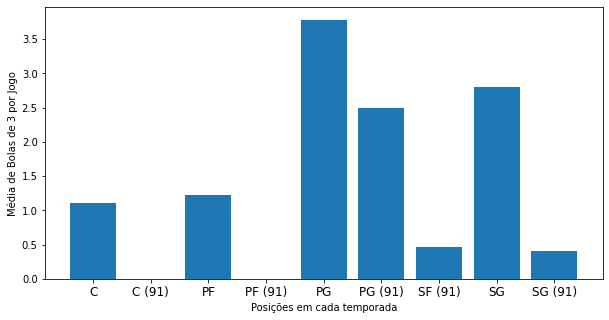

In [52]:
import matplotlib.pyplot as plt

positions = [pos for pos, df in best.groupby('Pos')]

plt.figure(figsize=(10, 5))
plt.bar(positions, mean['3P'])
plt.xticks(positions, size=12)
plt.ylabel('Média de Bolas de 3 por Jogo')
plt.xlabel('Posições em cada temporada')
plt.show()